In [1]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# 加载图像
img = Image.open('input.png')
img_array = np.array(img)

# 对每个RGB通道进行小波变换
coeffs_r = pywt.dwt2(img_array[:, :, 0], 'db1')
coeffs_g = pywt.dwt2(img_array[:, :, 1], 'db1')
coeffs_b = pywt.dwt2(img_array[:, :, 2], 'db1')

# 提取高频和低频部分
cA_r, (cH_r, cV_r, cD_r) = coeffs_r
cA_g, (cH_g, cV_g, cD_g) = coeffs_g
cA_b, (cH_b, cV_b, cD_b) = coeffs_b

# 低频部分逆DWT
low_r = pywt.idwt2((cA_r, (None, None, None)), 'db1')
low_g = pywt.idwt2((cA_g, (None, None, None)), 'db1')
low_b = pywt.idwt2((cA_b, (None, None, None)), 'db1')

low_img = np.stack([low_r, low_g, low_b], axis=2).astype(np.uint8)

# 高频部分逆DWT
high_r = pywt.idwt2((None, (cH_r, cV_r, cD_r)), 'db1')
high_g = pywt.idwt2((None, (cH_g, cV_g, cD_g)), 'db1')
high_b = pywt.idwt2((None, (cH_b, cV_b, cD_b)), 'db1')

high_img = np.stack([high_r, high_g, high_b], axis=2).astype(np.uint8)

# 保存处理后的图像
Image.fromarray(low_img).save('low_output.png')
Image.fromarray(high_img).save('high_output.png')

# 可视化小波变换后的结果
fig, axs = plt.subplots(3, 4, figsize=(20, 10))

# R通道
axs[0, 0].imshow(cA_r, cmap='gray')
axs[0, 0].set_title('R - Approximation')
axs[0, 1].imshow(cH_r, cmap='gray')
axs[0, 1].set_title('R - Horizontal detail')
axs[0, 2].imshow(cV_r, cmap='gray')
axs[0, 2].set_title('R - Vertical detail')
axs[0, 3].imshow(cD_r, cmap='gray')
axs[0, 3].set_title('R - Diagonal detail')

# G通道
axs[1, 0].imshow(cA_g, cmap='gray')
axs[1, 0].set_title('G - Approximation')
axs[1, 1].imshow(cH_g, cmap='gray')
axs[1, 1].set_title('G - Horizontal detail')
axs[1, 2].imshow(cV_g, cmap='gray')
axs[1, 2].set_title('G - Vertical detail')
axs[1, 3].imshow(cD_g, cmap='gray')
axs[1, 3].set_title('G - Diagonal detail')

# B通道
axs[2, 0].imshow(cA_b, cmap='gray')
axs[2, 0].set_title('B - Approximation')
axs[2, 1].imshow(cH_b, cmap='gray')
axs[2, 1].set_title('B - Horizontal detail')
axs[2, 2].imshow(cV_b, cmap='gray')
axs[2, 2].set_title('B - Vertical detail')
axs[2, 3].imshow(cD_b, cmap='gray')
axs[2, 3].set_title('B - Diagonal detail')

for ax_row in axs:
    for ax in ax_row:
        ax.axis('off')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'input.png'

In [72]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import cv2

# 加载图像
img = cv2.imread('input.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 对每个RGB通道进行小波变换
coeffs_r = pywt.dwt2(img[:, :, 0], 'db1')
coeffs_g = pywt.dwt2(img[:, :, 1], 'db1')
coeffs_b = pywt.dwt2(img[:, :, 2], 'db1')

# 从小波系数中提取高频和低频部分
# 注意：cA代表逼近系数（低频），cH、cV和cD分别代表水平、垂直和对角线的细节系数（高频）

cA_r, (cH_r, cV_r, cD_r) = coeffs_r
cA_g, (cH_g, cV_g, cD_g) = coeffs_g
cA_b, (cH_b, cV_b, cD_b) = coeffs_b

# 使用低频部分进行逆DWT，以恢复图像
low_r = pywt.idwt2((cA_r, (None, None, None)), 'db1')
low_g = pywt.idwt2((cA_g, (None, None, None)), 'db1')
low_b = pywt.idwt2((cA_b, (None, None, None)), 'db1')

low_img = np.stack([low_r, low_g, low_b], axis=2).astype(np.uint8)

# 使用高频部分进行逆DWT，以恢复图像
high_r = pywt.idwt2((None, (cH_r, cV_r, cD_r)), 'db1')
high_g = pywt.idwt2((None, (cH_g, cV_g, cD_g)), 'db1')
high_b = pywt.idwt2((None, (cH_b, cV_b, cD_b)), 'db1')

high_img = np.stack([high_r, high_g, high_b], axis=2).astype(np.uint8)

# high_r = pywt.idwt2((cA_r, (cH_r, cV_r, cD_r)), 'db1')
# high_g = pywt.idwt2((cA_g, (cH_g, cV_g, cD_g)), 'db1')
# high_b = pywt.idwt2((cA_b, (cH_b, cV_b, cD_b)), 'db1')
# truth = np.stack([high_r, high_g, high_b], axis=2).astype(np.uint8)

# 保存处理后的图像
cv2.imwrite('low_output.png', cv2.cvtColor(low_img, cv2.COLOR_RGB2BGR))
cv2.imwrite('high_output.png', cv2.cvtColor(high_img, cv2.COLOR_RGB2BGR))
# cv2.imwrite('ture_output.png', cv2.cvtColor(truth, cv2.COLOR_RGB2BGR))

True

In [13]:
from torchvision.transforms import Resize, InterpolationMode
from torchvision import transforms
import torch

img = transforms.ToTensor()(Image.open('input.png').convert('RGB'))
resize = Resize((32, 32), interpolation=InterpolationMode.BICUBIC, antialias=True)
img = resize(img).clamp(-1, 1)
high_sample = (img * 255).clamp(0, 255).to(torch.uint8)
high_sample = high_sample.permute(1, 2, 0).cpu().numpy()
Image.fromarray(np.uint8(high_sample)).save("resize_h.png")    

In [14]:
resize = transforms.ToTensor()(Image.open('resize.png').convert('RGB'))
resize_h = transforms.ToTensor()(Image.open('resize_h.png').convert('RGB'))

print((resize - resize_h).mean().item())

-0.0025748058687895536


In [5]:
import cv2
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np

def calculate_ssim(image1_path, image2_path):
    # 读取图像
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    
    # 计算SSIM
    ssim_score = compare_ssim(image1, image2)
    return ssim_score
    
def calculate_psnr(image1_path, image2_path):
    # 读取图像
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)
    # 将图像转换为单精度浮点数
    image1 = image1.astype(np.float32)
    image2 = image2.astype(np.float32)
    # 计算MSE（均方误差）
    mse = np.mean((image1 - image2) ** 2)
    # 计算PSNR
    psnr = 10 * np.log10(255 ** 2 / mse)
    return psnr
    
def calculate_spectrum_similarity(image1_path, image2_path):
    # 读取图像
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    
    # 计算傅里叶变换
    f1 = np.fft.fft2(image1)
    f2 = np.fft.fft2(image2)
    
    # 计算频谱相似度
    spectrum_similarity = np.abs(np.sum(f1 * np.conj(f2)) / (np.linalg.norm(f1) * np.linalg.norm(f2)))
    return spectrum_similarity   
    
if __name__ == "__main__":
    image1_path = "HR_000003.png"  # 替换为第一幅图像的文件路径
    image2_path = "flickr_cat_000003.png"  # 替换为第二幅图像的文件路径
    
    similarity = calculate_ssim(image1_path, image2_path)
    print(f"SSIM相似度: {similarity:.6f}")
    similarity = calculate_spectrum_similarity(image1_path, image2_path)
    print(f"频谱相似度: {similarity:.6f}")
    psnr_value = calculate_psnr(image1_path, image2_path)
    print(f"PSNR相似度: {psnr_value:.2f} dB")


SSIM相似度: 1.000000
频谱相似度: 1.000000
PSNR相似度: inf dB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19460\3683405696.py:24: RuntimeWarning: divide by zero encountered in divide
  psnr = 10 * np.log10(255 ** 2 / mse)


In [89]:
# 已经写好的dwt变换函数
# opencv的小波变换库比torch的好
import math
import random
import torch
from PIL import Image
import numpy as np
import blobfile as bf
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from torchvision.transforms import Resize, InterpolationMode
import torch
import torch.nn.functional as F
from pytorch_wavelets import DWTForward, DWTInverse
from torchvision.transforms import Resize, InterpolationMode


import numpy as np
import pywt
import cv2
import torch

def center_crop_arr(pil_image, image_size):
    # We are not on a new enough PIL to support the `reducing_gap`
    # argument, which uses BOX downsampling at powers of two first.
    # Thus, we do it by hand to improve downsample quality.
    while min(*pil_image.size) >= 2 * image_size:
        pil_image = pil_image.resize(
            tuple(x // 2 for x in pil_image.size), resample=Image.BOX
        )

    scale = image_size / min(*pil_image.size)
    pil_image = pil_image.resize(
        tuple(round(x * scale) for x in pil_image.size), resample=Image.BICUBIC
    )

    arr = np.array(pil_image)
    crop_y = (arr.shape[0] - image_size) // 2
    crop_x = (arr.shape[1] - image_size) // 2
    return arr[crop_y : crop_y + image_size, crop_x : crop_x + image_size]

def wavelet_transform(x):
    # 输入x的形状应为[batch, 3, 128, 128]
    batch_size, _, _, _ = x.shape
    x = x.permute(0, 2, 3, 1)  # 调整通道位置，变为[batch, 128, 128, 3]
    x = x.cpu().numpy()  # 将tensor转为numpy数组

    high_images = []
    low_images = []

    for i in range(batch_size):
        img = x[i] * 127.5+127.5  # [-1,1] -> [0,255]
        img = img.astype(np.uint8)

        # 对每个RGB通道进行小波变换
        coeffs_r = pywt.dwt2(img[:, :, 0], 'db1')
        coeffs_g = pywt.dwt2(img[:, :, 1], 'db1')
        coeffs_b = pywt.dwt2(img[:, :, 2], 'db1')

        cA_r, (cH_r, cV_r, cD_r) = coeffs_r
        cA_g, (cH_g, cV_g, cD_g) = coeffs_g
        cA_b, (cH_b, cV_b, cD_b) = coeffs_b

        # 使用低频部分进行逆DWT，以恢复图像
        low_r = pywt.idwt2((cA_r, (None, None, None)), 'db1')
        low_g = pywt.idwt2((cA_g, (None, None, None)), 'db1')
        low_b = pywt.idwt2((cA_b, (None, None, None)), 'db1')

        low_img = np.stack([low_r, low_g, low_b], axis=2)

        # 使用高频部分进行逆DWT，以恢复图像
        high_r = pywt.idwt2((None, (cH_r, cV_r, cD_r)), 'db1')
        high_g = pywt.idwt2((None, (cH_g, cV_g, cD_g)), 'db1')
        high_b = pywt.idwt2((None, (cH_b, cV_b, cD_b)), 'db1')

        high_img = np.stack([high_r, high_g, high_b], axis=2)

        high_images.append(high_img)
        low_images.append(low_img)

    high_images = np.stack(high_images, axis=0)
    low_images = np.stack(low_images, axis=0)

    # 使用OpenCV缩放低频图像到32x32
    #low_images = np.array([cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC) for img in low_images])

    high_x = torch.tensor(high_images, dtype=torch.float32).permute(0, 3, 1, 2) / 127.5 -1  
    low_x = torch.tensor(low_images, dtype=torch.float32).permute(0, 3, 1, 2) / 127.5 -1

    return high_x, low_x



    
high_path = 'input.png'
with bf.BlobFile(high_path, "rb") as f:
    high_pil_image = Image.open(f)
    high_pil_image.load()
high_pil_image = high_pil_image.convert("RGB")
high_arr = center_crop_arr(high_pil_image, 128)
high_arr = high_arr.astype(np.float32) / 127.5 - 1 # 归一化到[-1, 1]
high_arr_tensor = torch.tensor(np.transpose(high_arr, [2, 0, 1]), dtype=torch.float32)
high_arr_tensor=high_arr_tensor.unsqueeze(0)

high_x, low_x = wavelet_transform(high_arr_tensor)

high_sample = (high_x[0]*127.5+127.5).clamp(0, 255).to(torch.uint8)
high_sample = high_sample.permute(1, 2, 0).cpu().numpy()
Image.fromarray(np.uint8(high_sample)).save(f"high.png")

high_sample = (low_x[0]*127.5+127.5).clamp(0, 255).to(torch.uint8)
high_sample = high_sample.permute(1, 2, 0).cpu().numpy()
Image.fromarray(np.uint8(high_sample)).save(f"low.png")

In [15]:
for i in range(2):
    print(i)

0
1


# 提取PSNR

Maximum PSNR is 25.8515 at epoch 55


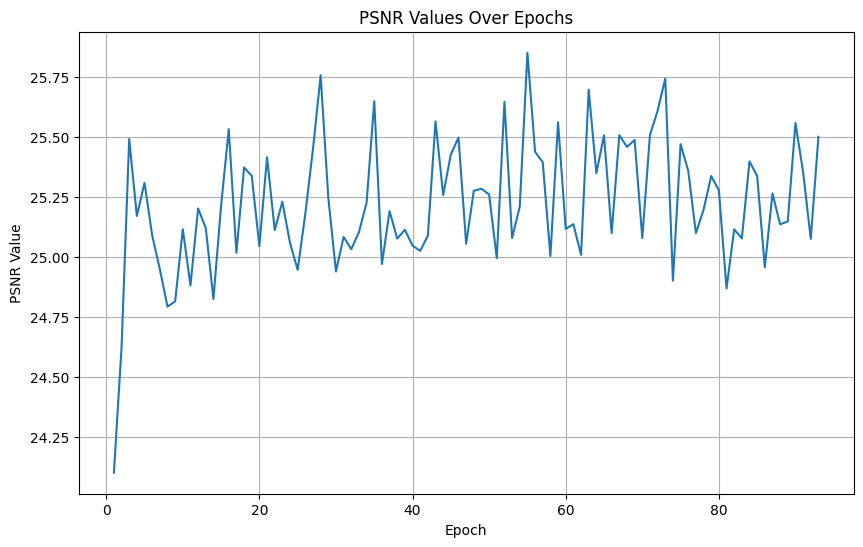

In [1]:
import re
import matplotlib.pyplot as plt

# 读取文件内容
with open("lte.log", "r", encoding="utf-8") as f:
    content = f.read()

# 使用正则表达式从文件内容中找到所有psnr数值和epoch
matches = re.findall(r'epoch (\d+)/\d+,.*psnr=(\d+\.\d+)', content)

# 分别提取epoch和psnr数值
epochs, psnr_values = zip(*[(int(epoch), float(psnr)) for epoch, psnr in matches])
max_psnr_index = psnr_values.index(max(psnr_values))
max_psnr_epoch = epochs[max_psnr_index]
print(f"Maximum PSNR is {psnr_values[max_psnr_index]:.4f} at epoch {max_psnr_epoch}")

# 使用matplotlib绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(epochs, psnr_values)
plt.title("PSNR Values Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("PSNR Value")
plt.grid(True)
plt.show()

In [2]:
import pandas as pd

# 使用pandas读取Excel文件
df = pd.read_excel('data.xlsx', engine='openpyxl')

# 初始化一个空的数据集
data = []

# 遍历df的每一行和每一列，获取z值，x为列序号，y为行序号
for i, row in df.iterrows():
    for j, z in enumerate(row):
        x = j
        y = i
        data.append((x, y, z))

# 将data转化为一个新的DataFrame
df_new = pd.DataFrame(data, columns=['x', 'y', 'z'])

# 打印结果
print(df_new)


         x    y      z
0        0    0   0.00
1        1    0  24.40
2        2    0  24.12
3        3    0  23.85
4        4    0  23.59
...    ...  ...    ...
50697  197  250  66.09
50698  198  250  65.87
50699  199  250  65.65
50700  200  250  65.42
50701  201  250  65.20

[50702 rows x 3 columns]


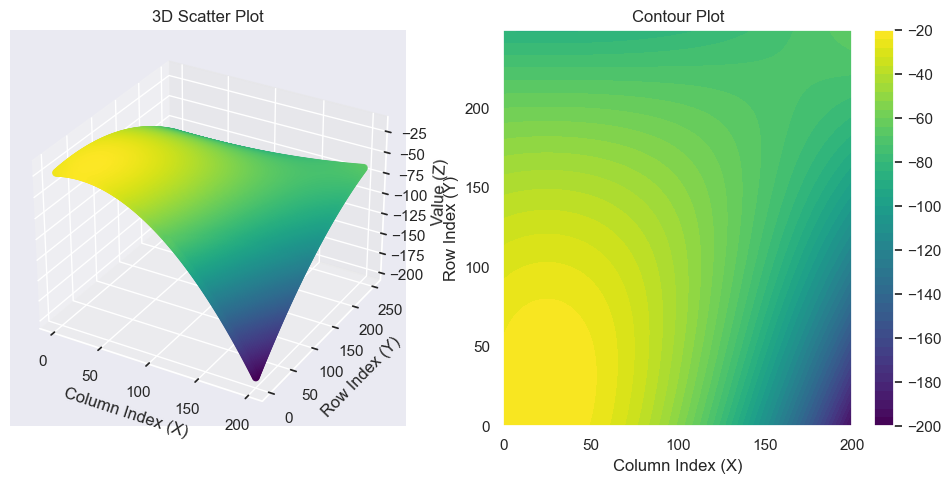

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取Excel文件
data = pd.read_excel('data.xlsx').values

# 创建X, Y网格
x = np.arange(0, data.shape[1], 1)  # Column indices
y = np.arange(0, data.shape[0], 1)  # Row indices
X, Y = np.meshgrid(x, y)

# 创建一个图像窗口
fig = plt.figure(figsize=(10,5))

# 在左边绘制3D散点图
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X, Y, -data, c=-data, cmap='viridis', marker='o')
ax1.set_xlabel('Column Index (X)')
ax1.set_ylabel('Row Index (Y)')
ax1.set_zlabel('Value (Z)')
ax1.set_title('3D Scatter Plot')

# 在右边绘制2D等高线图
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, -data, 50, cmap='viridis')
fig.colorbar(contour, ax=ax2, orientation='vertical')
ax2.set_xlabel('Column Index (X)')
ax2.set_ylabel('Row Index (Y)')
ax2.set_title('Contour Plot')

plt.tight_layout()
plt.show()


In [5]:
data

array([[0.0000e+00, 2.4400e+01, 2.4120e+01, ..., 1.9319e+02, 1.9519e+02,
        1.9720e+02],
       [2.0000e-02, 2.4320e+01, 2.4040e+01, ..., 1.9236e+02, 1.9435e+02,
        1.9635e+02],
       [4.0000e-02, 2.4250e+01, 2.3970e+01, ..., 1.9154e+02, 1.9352e+02,
        1.9551e+02],
       ...,
       [4.9600e+00, 8.3290e+01, 8.3310e+01, ..., 6.6030e+01, 6.5830e+01,
        6.5620e+01],
       [4.9800e+00, 8.3840e+01, 8.3870e+01, ..., 6.5840e+01, 6.5620e+01,
        6.5410e+01],
       [5.0000e+00, 8.4400e+01, 8.4430e+01, ..., 6.5650e+01, 6.5420e+01,
        6.5200e+01]])

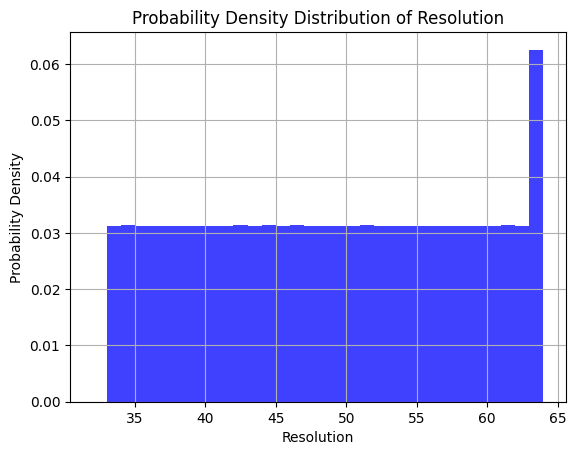

In [4]:
import random
import math
import matplotlib.pyplot as plt

# 采样次数
sample_size = 10000000

# 采样结果列表
samples = []

# 进行2000次采样
for _ in range(sample_size):
    resolution = math.ceil((64 - 32) * random.random() + 32)
    samples.append(resolution)

# 绘制概率密度分布图
plt.hist(samples, bins=range(32, 65), density=True, alpha=0.75, color='b')
plt.xlabel('Resolution')
plt.ylabel('Probability Density')
plt.title('Probability Density Distribution of Resolution')
plt.grid(True)
plt.show()


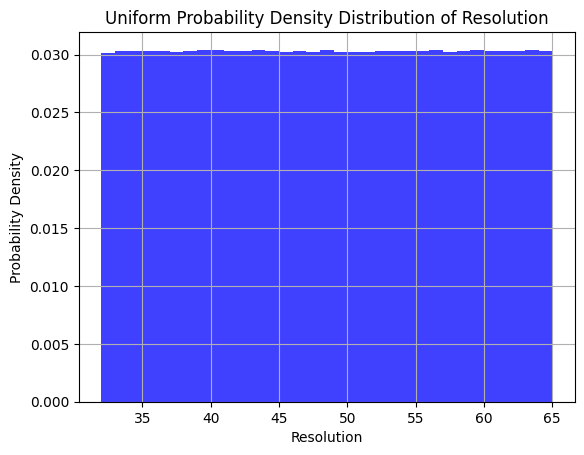

In [6]:
import random
import matplotlib.pyplot as plt

# 采样次数
sample_size = 10000000

# 采样结果列表
samples = []

# 进行2000次采样
for _ in range(sample_size):
    resolution = random.randint(32, 64)
    samples.append(resolution)

# 绘制概率密度分布图
plt.hist(samples, bins=range(32, 66), density=True, alpha=0.75, color='b')
plt.xlabel('Resolution')
plt.ylabel('Probability Density')
plt.title('Uniform Probability Density Distribution of Resolution')
plt.grid(True)
plt.show()
